<a href="https://colab.research.google.com/github/jona8888/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

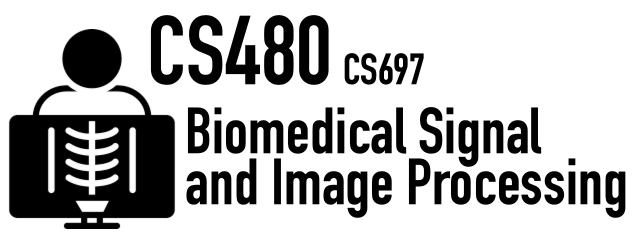
# Assignment 1


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [5]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [2]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

In [6]:
ecg

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

In [7]:
first_second = ecg[0:SAMPLING_RATE*1] # first second, 360 samples per second
second_second = ecg[SAMPLING_RATE*1:SAMPLING_RATE*2] #2nd second
third_second = ecg[SAMPLING_RATE*2:SAMPLING_RATE*3]# 3rd second

ninth_second = ecg[SAMPLING_RATE*8:SAMPLING_RATE*9]

tenth_second = ecg[SAMPLING_RATE*9:SAMPLING_RATE*10]

eleventh_second = ecg[SAMPLING_RATE*10:SAMPLING_RATE*11]

from9to11seconds = ecg[SAMPLING_RATE*8:SAMPLING_RATE*10] # 9 to 11 seconds

from10to12seconds = ecg[SAMPLING_RATE*9:SAMPLING_RATE*11]

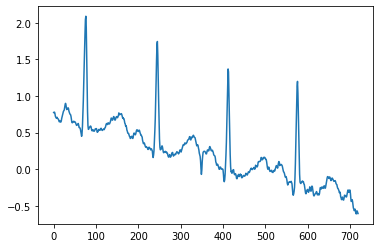

In [8]:
plt.plot(from9to11seconds)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


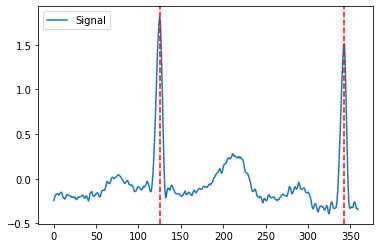

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

     |████████████████████████████████| 993kB 6.5MB/s 
{'ECG_R_Peaks': array([245, 412, 576])}


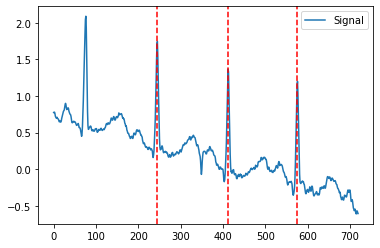

In [9]:

!pip install neurokit2
import neurokit2 as nk 
_, rpeaks = nk.ecg_peaks(ecg[SAMPLING_RATE*8:SAMPLING_RATE*10], sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks["ECG_R_Peaks"], ecg[SAMPLING_RATE*8:SAMPLING_RATE*10])
#plt.plot(rpeaks)
print(rpeaks)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [ ]:
there are some very weird pauses between the beats in the middle;
heartbeat seems fairly regular before and after 9 to 11 seconds

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [12]:
!pip install neurokit2
import neurokit2 as nk
section = ecg#[8*SAMPLING_RATE:10*SAMPLING_RATE] 
section=nk.ecg_clean(section)
_, rpeaks = nk.ecg_peaks(section, sampling_rate=SAMPLING_RATE)
waves, signals = nk.ecg_delineate(section, rpeaks=rpeaks, sampling_rate= SAMPLING_RATE)
print(waves["ECG_P_Peaks"])

0         0
1         0
2         0
3         0
4         0
         ..
107995    0
107996    0
107997    0
107998    0
107999    0
Name: ECG_P_Peaks, Length: 108000, dtype: int64


In [ ]:
# TODO Does the detection work well?

In [ ]:
yes

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [ ]:
# TODO Does the filtering improve the result?

In [ ]:
yes

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#